Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

In [1385]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [1386]:
passengers_data = pd.read_csv("airline-passengers.csv")
passengers_data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


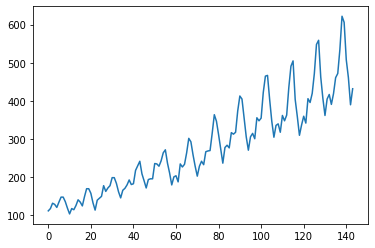

In [1387]:
plt.plot(passengers_data['Passengers'])

In [1388]:
dataset = passengers_data.iloc[:,1].values
dataset = dataset.reshape(-1,1)
dataset = dataset.astype('float32')
dataset.shape

(144, 1)

In [1389]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [1390]:
train_size = int(len(dataset)*0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
train.shape
test.shape

(72, 1)

In [1391]:
def get_data(data , lag = 10, delay = 0, next_steps = 1):
    """ Here slices for windowing are created """

    np_data = np.array(data)  # Convert to the numpy array for slicing data
    N = np_data.shape[0] # Total number of samples
    k = N - (lag + delay + next_steps)

    # Create Input and output Slice
    in_slice = np.array([range(i, i + lag) for i in range(k)])
    op_slice = np.array([range(i + lag + delay, i + lag + delay + next_steps) for i in range(k)])

    return np_data[in_slice,:], np_data[op_slice,:]

In [1392]:
X_train, y_train = get_data(train, 5)
X_test, y_test = get_data(test, 5)

In [1393]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [1394]:
X_train.shape

(66, 5, 1)

In [1395]:
X_test.shape

(66, 5, 1)

In [1396]:
model = Sequential()
model.add(LSTM(2, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=['mae'])

In [1397]:
model.summary()

Model: "sequential_81"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_97 (LSTM)              (None, 2)                 32        
                                                                 
 dense_79 (Dense)            (None, 1)                 3         
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [1398]:
model.fit(X_train, y_train, epochs=300, batch_size=10)

Epoch 1/300
7/7 [==============================] - 1s 6ms/step - loss: 0.0039 - mae: 0.0511
Epoch 2/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0029 - mae: 0.0426
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0400
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0404
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0410
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0406
Epoch 7/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0401
Epoch 8/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0398
Epoch 9/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0026 - mae: 0.0398
Epoch 10/300
7/7 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0397
Epoch 11/300
7/7 [==============================] - 0s 5ms/step - loss: 0.0026 

In [1399]:
y_pred = model.predict(X_test)

In [1400]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

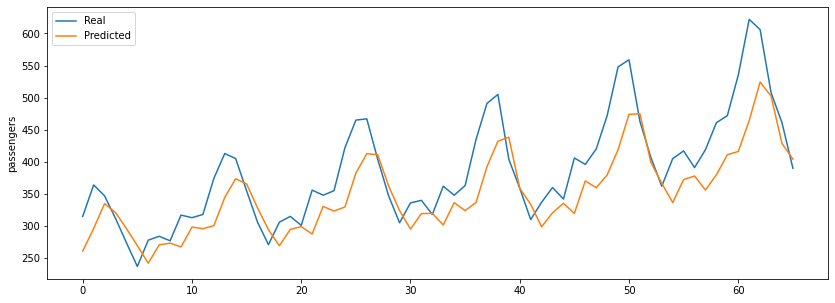

In [1401]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real')
plt.plot(y_pred, label = 'Predicted')
plt.ylabel('passengers')
plt.legend()
plt.show()

Так как данных очень мало, достаточно сети с одним слоем и 3 нейронами. При большем количестве эпох можно обучить и 2 нейрона.